<a href="https://colab.research.google.com/github/bonillahermes/Ciencia_Datos/blob/main/MergeyLimpieza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Multidimensional de la Pandemia de COVID-19: Correlación entre Comportamientos Temporales, Casos Totales y la Inversión Pública en Salud a Nivel Global

## Introducción

Este informe se propone explorar las dinámicas globales de la pandemia de COVID-19, con especial atención en identificar patrones de comportamiento entre países en cuanto a la evolución temporal y la acumulación de casos confirmados. Este análisis se enriquecerá con datos sobre inversión pública en salud, obtenidos de módulos adicionales de la Organización Mundial de la Salud (OMS). Al correlacionar la progresión de la pandemia con los niveles de inversión en salud pública por país, el estudio busca desvelar cómo la preparación y respuesta en materia de salud pública han influido en el curso de la pandemia. Esta aproximación multidimensional pretende ofrecer una comprensión más profunda de la efectividad de las políticas de salud pública y señalar estrategias para fortalecer la resiliencia ante futuras crisis sanitarias.

## Descripción de la Base de Datos Inicial

La base de datos inicial, suministrada por el Centro Europeo para la Prevención y Control de Enfermedades (ECDC), compila de manera exhaustiva los casos confirmados de COVID-19 y las muertes asociadas a nivel mundial. Esta base destaca por su detallado registro temporal y geográfico, ofreciendo datos actualizados regularmente sobre el número de casos confirmados y fallecimientos por país. La integración de estos datos con información sobre inversión pública en salud de la OMS permite un análisis detallado de la interacción entre la gestión de la pandemia y las políticas de salud pública.

## Técnicas de Inteligencia Artificial Propuestas

Para el análisis del catálogo de datos generado y la consecución de los objetivos del estudio, se recomiendan las siguientes técnicas de inteligencia artificial:

1. **Clustering (Agrupamiento)**: Utilizar algoritmos como K-means o DBSCAN para identificar conglomerados de países que presentan patrones similares en la evolución de la pandemia y en la inversión en salud pública. Este enfoque permitirá comparar las respuestas a la pandemia entre distintos grupos de países.

2. **Análisis de Componentes Principales (PCA)**: PCA puede emplearse para reducir la dimensionalidad de los datos, mejorando la visualización de las relaciones complejas entre la inversión en salud y los indicadores de COVID-19, y destacando las variables más influyentes en la similitud entre los países.

3. **Modelos Predictivos**: Implementar técnicas de aprendizaje automático supervisado, como regresión lineal, regresión logística, o máquinas de vector de soporte (SVM), para predecir el impacto de la inversión en salud en la magnitud de la pandemia, basándose en datos históricos y actuales.

La aplicación conjunta de estas técnicas de IA proporcionará una comprensión exhaustiva y basada en datos de cómo la inversión en salud pública ha influido en la trayectoria de la pandemia de COVID-19, ofreciendo insights valiosos para la toma de decisiones en políticas de salud.


## Cargar Base de Datos

In [ ]:
# Librerías Necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Importar las bibliotecas necesarias para PCA y gráficos
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# URL directa al archivo .xlsx
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'

columns_to_use = ['dateRep', 'year', 'countriesAndTerritories', 'cases', 'deaths', 'popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']
df = pd.read_excel(url, usecols=columns_to_use)


In [ ]:
df.head()

,dateRep,year,cases,deaths,countriesAndTerritories,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,2020,746,6,Afghanistan,38041757.0,9.013779
1,2020-12-13,2020,298,9,Afghanistan,38041757.0,7.052776
2,2020-12-12,2020,113,11,Afghanistan,38041757.0,6.868768
3,2020-12-11,2020,63,10,Afghanistan,38041757.0,7.134266
4,2020-12-10,2020,202,16,Afghanistan,38041757.0,6.968658


### Limpieza de la base

In [ ]:
def clean_data(df):
    df_filtered = df.drop(['dateRep'], axis=1)
    return df_filtered[df_filtered['year'] == 2020]
df_2020 = clean_data(df)

In [ ]:
# Preparar el diccionario de agregación, ajustado para las columnas restantes
agg_dict = {col: 'first' for col in df_2020.columns if col not in ['cases', 'deaths', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']}
agg_dict['cases'] = 'sum'
agg_dict['deaths'] = 'sum'
agg_dict['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'] = 'sum'

# Agrupar por 'countriesAndTerritories' y aplicar el diccionario de agregación
grouped_df = df_2020.groupby(['countriesAndTerritories'], as_index=False).agg(agg_dict)

# Mostrar el DataFrame resultante
grouped_df.head()

,year,countriesAndTerritories,popData2019,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020,Afghanistan,38041757.0,49273,1971,1750.302963
1,2020,Albania,2862427.0,48530,1003,21166.897881
2,2020,Algeria,43053054.0,92102,2596,2867.464408
3,2020,Andorra,76177.0,7338,79,128373.393544
4,2020,Angola,31825299.0,16188,371,688.424011


### Guardar Base Limpia

In [ ]:
# Guardar el DataFrame agrupado en un archivo CSV
grouped_df.to_csv('grouped_covid_data_2020.csv', index=False)


### Cargar base de datos auxiliar

In [ ]:
file_path = 'data.csv'  # Ruta al archivo .csv

dfaux = pd.read_csv(file_path, skiprows=1)
dfaux.head()

,"Countries, territories and areas",2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,Afghanistan,21.83,15.53,14.83,14.21,12.62,11.82,10.11,9.53,8.81,...,9.82,10.26,9.90,10.62,9.95,9.81,8.94,9.44,NaN,NaN
1,Albania,7.27,7.52,6.86,6.67,6.58,6.73,6.46,6.43,6.28,...,5.83,5.51,5.93,5.63,5.73,5.89,5.91,5.66,5.93,5.94
2,Algeria,5.53,6.14,5.87,6.39,6.53,6.59,6.96,6.55,6.04,...,5.36,4.20,3.82,3.36,3.24,3.54,3.60,3.73,3.84,3.49
3,Andorra,8.33,8.79,7.32,7.38,7.07,6.91,6.92,6.77,6.80,...,6.08,5.67,4.92,4.97,5.59,5.29,5.55,6.00,5.86,5.95
4,Angola,2.96,3.22,2.48,2.59,2.79,2.71,2.61,2.43,2.73,...,3.84,3.32,2.97,2.69,2.85,3.97,3.55,3.33,4.48,1.91


### Limpieza de datos de la base auxiliar

In [ ]:
dfaux.rename(columns={"Countries, territories and areas": "Countries"}, inplace=True)

In [ ]:
# Calcular el promedio de la inversión en salud por país en 'dfaux'
average_investment = dfaux.iloc[:, 1:].mean(axis=1)
dfaux['Average_Investment'] = average_investment

In [ ]:
# Mostrar los resultados actualizados de 'dfaux'
dfaux[['Countries', 'Average_Investment']]

,Countries,Average_Investment
0,Afghanistan,11.153000
1,Albania,6.242727
2,Algeria,5.053182
3,Andorra,6.553636
4,Angola,2.962727
...,...,...
187,Venezuela (Bolivarian Republic of),3.185000
188,Viet Nam,4.580909
189,Yemen,5.200625
190,Zambia,5.045909


In [ ]:
# Reemplazar guiones bajos por espacios en los nombres de los países en 'grouped_df'
grouped_df['countriesAndTerritories'] = grouped_df['countriesAndTerritories'].str.replace('_', ' ')

# Ahora, filtrar 'grouped_df' para mantener solo las filas cuyos países estén en 'dfaux'
filtered_grouped_df = grouped_df[grouped_df['countriesAndTerritories'].isin(dfaux['Countries'])]

# 'filtered_grouped_df' ahora contiene solo los países que están presentes en 'dfaux', con los nombres normalizados
filtered_grouped_df.head()


,year,countriesAndTerritories,popData2019,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020,Afghanistan,38041757.0,49273,1971,1750.302963
1,2020,Albania,2862427.0,48530,1003,21166.897881
2,2020,Algeria,43053054.0,92102,2596,2867.464408
3,2020,Andorra,76177.0,7338,79,128373.393544
4,2020,Angola,31825299.0,16188,371,688.424011


### Combinación de las bases de datos

In [ ]:
# Realizar el merge (fusión) de 'filtered_grouped_df' con 'dfaux' basado en los nombres de los países
df_final = pd.merge(filtered_grouped_df, dfaux, left_on='countriesAndTerritories', right_on='Countries', how='left')

# Muestra las primeras filas para verificar el resultado
df_final.head()

,year,countriesAndTerritories,popData2019,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Countries,2021,2020,2019,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,Average_Investment
0,2020,Afghanistan,38041757.0,49273,1971,1750.302963,Afghanistan,21.83,15.53,14.83,...,10.26,9.90,10.62,9.95,9.81,8.94,9.44,NaN,NaN,11.153000
1,2020,Albania,2862427.0,48530,1003,21166.897881,Albania,7.27,7.52,6.86,...,5.51,5.93,5.63,5.73,5.89,5.91,5.66,5.93,5.94,6.242727
2,2020,Algeria,43053054.0,92102,2596,2867.464408,Algeria,5.53,6.14,5.87,...,4.20,3.82,3.36,3.24,3.54,3.60,3.73,3.84,3.49,5.053182
3,2020,Andorra,76177.0,7338,79,128373.393544,Andorra,8.33,8.79,7.32,...,5.67,4.92,4.97,5.59,5.29,5.55,6.00,5.86,5.95,6.553636
4,2020,Angola,31825299.0,16188,371,688.424011,Angola,2.96,3.22,2.48,...,3.32,2.97,2.69,2.85,3.97,3.55,3.33,4.48,1.91,2.962727


### Guardar base final

In [ ]:
# Guardar el DataFrame agrupado en un archivo CSV
df_final.to_csv('merged_df.csv', index=False)

## Clustering


En el análisis de clustering realizado, se identificaron tres clústeres distintos dentro del conjunto de datos de COVID-19 que reflejan la carga de la enfermedad a nivel nacional, así como la inversión en salud pública. A continuación, se presenta un análisis detallado de cada clúster basado en los resultados obtenidos:

## Metodología:
Se implementó el algoritmo de K-Means utilizando un conjunto de características que incluían el número total de casos y muertes, la población total de 2019, la tasa acumulativa de 14 días de casos de COVID-19 por 100,000 y la inversión promedio en salud pública. Las características fueron previamente escaladas para asegurar la uniformidad en la contribución de cada variable al proceso de clustering. El número óptimo de clústeres se determinó utilizando el método del codo, identificando un cambio en la inercia.

## Resultados del Clustering:
### Cluster 0:
Compuesto por un conjunto diverso de 80 países, este clúster se caracteriza por tener la menor media de casos y muertes reportadas, con valores de 81,643 y 2,546 respectivamente. Sin embargo, el coeficiente de variación (CV) en ambos casos (2.12) y muertes (4.58) sugiere una alta heterogeneidad en la incidencia y mortalidad del COVID-19 dentro del clúster. Esto puede atribuirse a diferencias en la capacidad de los sistemas de salud para detectar y reportar casos, variabilidad en la implementación de medidas de salud pública, o diferencias en las etapas de la pandemia durante el periodo de reporte.

### Cluster 1:
El más pequeño, compuesto únicamente por Brasil, India y Estados Unidos, muestra la más alta carga de la enfermedad con una media de 11,014,268 casos y 207,978 muertes. El CV relativamente bajo de 0.43 y 0.39 para casos y muertes, respectivamente, indica una homogeneidad en la magnitud de la pandemia en estos países. Estos son países con grandes poblaciones y sistemas de salud que han enfrentado desafíos significativos debido a la escala de la crisis de salud.

### Cluster 2:
Este grupo incluye 52 países con una media de casos y muertes de 353,635 y 8,358, respectivamente. Aunque la media es mayor que en el Cluster 0, el CV de 1.47 para casos y 1.74 para muertes muestra menos variabilidad que el Cluster 0 pero más que el Cluster 1. Esto sugiere una respuesta intermedia a la pandemia, posiblemente indicando una mezcla de países con diferentes estrategias y eficacias en sus respuestas de salud pública.


In [ ]:
# Seleccionar las características para el clustering
features = df_final[['popData2019', 'cases', 'deaths', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'Average_Investment']]

# Normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

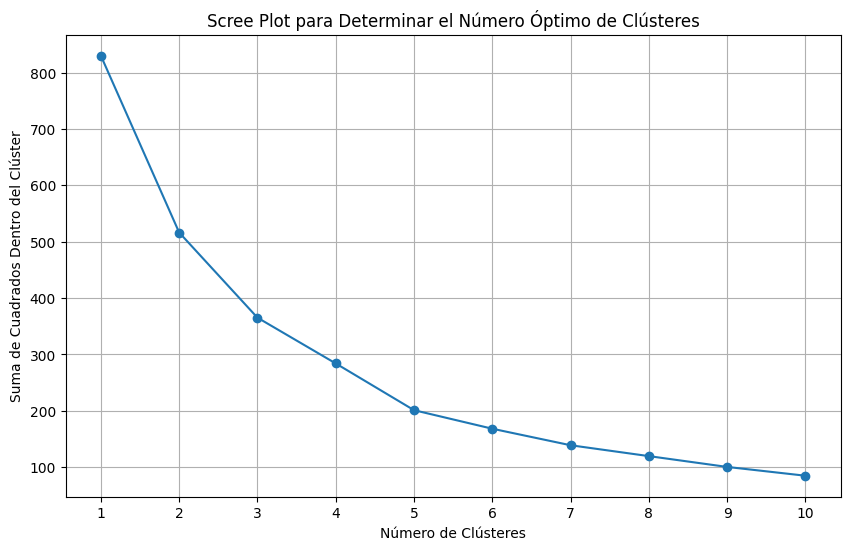

In [ ]:
inertia = []
k_range = range(1, 11)  # Probar desde 1 hasta 10 clústeres

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el scree plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Scree Plot para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de Cuadrados Dentro del Clúster')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.32416313846257433


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-19-0b659ab94245>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', kmeans.n_clusters)


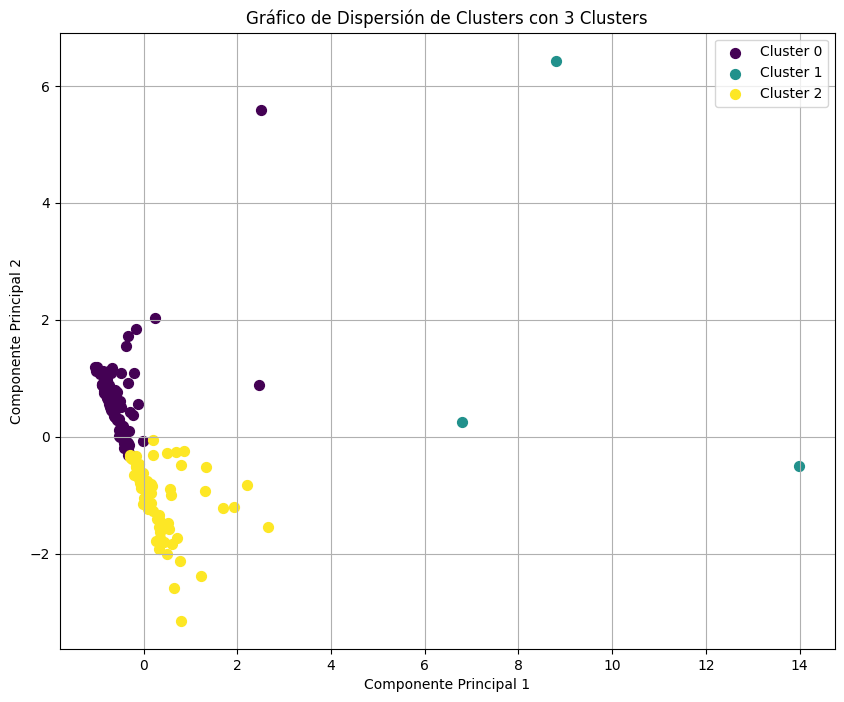

In [ ]:
# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)

# Aplicar PCA para la visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Preparar el DataFrame de PCA para la visualización
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
cmap = plt.cm.get_cmap('viridis', kmeans.n_clusters)
for i in range(kmeans.n_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], s=50, color=cmap(i), label=f'Cluster {i}')

plt.title('Gráfico de Dispersión de Clusters con 3 Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

### Aplicar PCA

In [ ]:
pca = PCA().fit(features_scaled)
print(np.cumsum(pca.explained_variance_ratio_))

[0.48462157 0.74945435 0.88316056 0.99125869 1.        ]


In [ ]:
# Aplicar PCA para reducir a 3 componentes
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_scaled)

# Preparar el DataFrame de PCA para la visualización
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Asumiendo que 'kmeans' es el modelo K-Means ya ajustado
pca_df['Cluster'] = kmeans.labels_

### Visualización 3D

<ipython-input-29-bf0d781eff11>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', kmeans.n_clusters)


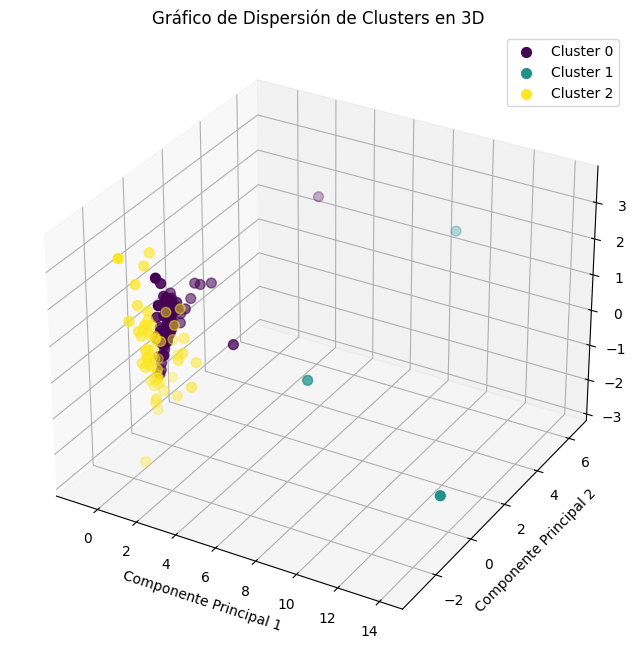

In [ ]:
# Crear el gráfico de dispersión en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Usar un mapa de colores
cmap = plt.cm.get_cmap('viridis', kmeans.n_clusters)

# Graficar cada cluster
for i in range(kmeans.n_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'],
               s=50, color=cmap(i), label=f'Cluster {i}')

ax.set_title('Gráfico de Dispersión de Clusters en 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend()
plt.show()


La distribución acumulativa de la varianza explicada por los componentes principales indica que el primer componente explica aproximadamente el 48.46% de la varianza, los dos primeros juntos el 74.95%, los tres primeros el 88.32%, los cuatro primeros el 99.13%, y con todos los cinco componentes se alcanza el 100% de la varianza explicada. Esto sugiere que los tres primeros componentes principales capturan la mayor parte de la información relevante, lo que hace razonable considerar solo estos para reducir la dimensionalidad y simplificar el análisis, manteniendo al mismo tiempo la mayoría de la información significativa de los datos.

### Visualización 3D Interactiva

In [ ]:
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Cluster')
fig.show()

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])
pipeline.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

### Caracterización de los clusters

In [ ]:
# Caracterización de los cluster
# Paso 1: Identificar los países en cada cluster
clusters_countries = df_final.groupby('Cluster')['Countries'].apply(list)
print(clusters_countries)

# Paso 2: Análisis Descriptivo por cluster
for cluster in sorted(df_final['Cluster'].unique()):
    print(f"Análisis para el Cluster {cluster}:")
    cluster_data = df_final[df_final['Cluster'] == cluster]

    # Calcular la media y la desviación estándar para las variables de interés
    mean_cases = cluster_data['cases'].mean()
    std_cases = cluster_data['cases'].std()
    mean_deaths = cluster_data['deaths'].mean()
    std_deaths = cluster_data['deaths'].std()

    # Calcular el coeficiente de variación (CV)
    cv_cases = std_cases / mean_cases if mean_cases else 0
    cv_deaths = std_deaths / mean_deaths if mean_deaths else 0

    print(f"Media de casos: {mean_cases:.2f}, Desviación estándar de casos: {std_cases:.2f}, CV de casos: {cv_cases:.2f}")
    print(f"Media de muertes: {mean_deaths:.2f}, Desviación estándar de muertes: {std_deaths:.2f}, CV de muertes: {cv_deaths:.2f}")

    # Listar los países en cada cluster
    countries_in_cluster = cluster_data['Countries'].tolist()
    print(f"Países en el Cluster {cluster}: {countries_in_cluster}\n")

    # Asumiendo que 'cluster_data' es un DataFrame con los casos para un cluster específico
    fig = px.histogram(cluster_data, x='cases', nbins=20, title=f'Histograma de Casos para el Cluster {cluster}')
    fig.update_layout(xaxis_title='Casos', yaxis_title='Frecuencia')
    fig.show()



Cluster
0    [Albania, Algeria, Angola, Antigua and Barbuda...
1            [Brazil, India, United States of America]
2    [Afghanistan, Andorra, Argentina, Armenia, Aus...
Name: Countries, dtype: object
Análisis para el Cluster 0:
Media de casos: 81643.15, Desviación estándar de casos: 173355.07, CV de casos: 2.12
Media de muertes: 2546.64, Desviación estándar de muertes: 11671.69, CV de muertes: 4.58
Países en el Cluster 0: ['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Botswana', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo', 'Cyprus', 'Democratic Republic of the Congo', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Indon

Análisis para el Cluster 1:
Media de casos: 11014268.67, Desviación estándar de casos: 4778707.05, CV de casos: 0.43
Media de muertes: 207978.00, Desviación estándar de muertes: 81239.38, CV de muertes: 0.39
Países en el Cluster 1: ['Brazil', 'India', 'United States of America']



Análisis para el Cluster 2:
Media de casos: 353635.73, Desviación estándar de casos: 520297.74, CV de casos: 1.47
Media de muertes: 8358.92, Desviación estándar de muertes: 14513.58, CV de muertes: 1.74
Países en el Cluster 2: ['Afghanistan', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bahrain', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Czechia', 'Denmark', 'El Salvador', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Honduras', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg', 'Maldives', 'Malta', 'Marshall Islands', 'Montenegro', 'Namibia', 'New Zealand', 'North Macedonia', 'Norway', 'Panama', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'San Marino', 'Sao Tome and Principe', 'Serbia', 'Sierra Leone', 'Slovakia', 'Slovenia', 'South Africa', 'South Sudan', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'Uruguay']



## Análisis Temporal
El análisis de los países con la mayor y menor inversión en salud pública revela insights significativos sobre las disparidades en la carga del COVID-19 y las respuestas a la pandemia. Este análisis utiliza datos agregados que incluyen la inversión promedio en salud como porcentaje del PIB, los casos y muertes totales reportados debido al COVID-19, y la clasificación de estos países en distintos clusters basados en un modelo de clustering previamente ejecutado.

### Países con Mayor Inversión en Salud
Los países con mayor inversión en salud presentan un rango amplio de casos y muertes de COVID-19, desde los Estados Unidos, con una inversión del 15.66% y el mayor número de casos y muertes reportados en este grupo, hasta las Islas Marshall, con una inversión del 14.89% pero un número extremadamente bajo de casos y ninguna muerte reportada. Este contraste resalta cómo factores adicionales, tales como la densidad poblacional, la conectividad internacional y las políticas de salud pública, juegan un papel crucial además de la inversión en salud. Francia y Alemania también muestran una alta inversión en salud con una carga significativa de la enfermedad, aunque menor que en los Estados Unidos, lo que sugiere una correlación entre la inversión en salud y la capacidad de respuesta a la pandemia, pero también indica que la inversión por sí sola no puede predecir los resultados de la pandemia.

### Países con Menor Inversión en Salud
Los países con menor inversión en salud, todos clasificados en el Cluster 0, demuestran una menor carga de la enfermedad en términos absolutos en comparación con los países de mayor inversión. Sin embargo, cuando se ajusta por población o capacidad económica, la perspectiva puede variar. Bangladesh, por ejemplo, a pesar de su baja inversión en salud del 2.18%, tiene un número significativo de casos y muertes, lo que subraya los desafíos que enfrentan los países con recursos limitados para gestionar crisis sanitarias de esta magnitud. Los otros países en este grupo, aunque con menores cifras absolutas de casos y muertes, reflejan una diversidad en la gestión de la pandemia que no se explica únicamente por la inversión en salud.

### Análisis Cluster
La clasificación en clusters sugiere una agrupación basada en patrones de casos, muertes e inversión en salud, donde el Cluster 1, representado solo por Estados Unidos, muestra la mayor carga de la enfermedad y la inversión en salud. Los países en el Cluster 2, aunque con una alta inversión, tienen menos casos y muertes en comparación, lo que puede reflejar una eficacia relativa en la mitigación de la pandemia. Los países en el Cluster 0, con menor inversión en salud, muestran una menor carga de la enfermedad, lo que podría indicar una etapa diferente de la pandemia, diferencias en la prueba y reporte de casos, o efectos de otras medidas de salud pública no capturadas por la inversión en salud solamente.

### Conclusión
Este análisis destaca la complejidad de las respuestas nacionales a la pandemia de COVID-19 y la importancia de la inversión en salud pública. Sin embargo, también subraya que la inversión por sí sola no es un predictor definitivo de los resultados de la pandemia, y que factores como la estructura poblacional, la geografía, la economía y las políticas específicas de salud pública desempeñan roles críticos en la gestión de la crisis sanitaria. La diversidad en la carga de la enfermedad y las respuestas entre países con niveles similares de inversión en salud sugiere que las estrategias adaptadas al contexto local son cruciales para abordar eficazmente los desafíos de salud pública global.


In [ ]:
# Los 5 países con la mayor inversión en salud
top_investment_countries = df_final.nlargest(5, 'Average_Investment')[['Countries', 'Average_Investment', 'cases', 'deaths', 'Cluster']]

# Los 5 países con la menor inversión en salud
bottom_investment_countries = df_final.nsmallest(5, 'Average_Investment')[['Countries', 'Average_Investment', 'cases', 'deaths', 'Cluster']]

# Imprime los resultados
print("Países con mayor inversión en salud y sus casos y muertes:")
print(top_investment_countries)
print("\nPaíses con menor inversión en salud y sus casos y muertes:")
print(bottom_investment_countries)


Países con mayor inversión en salud y sus casos y muertes:
                    Countries  Average_Investment     cases  deaths  Cluster
159  United States of America           15.657727  16256754  299177        1
98           Marshall Islands           14.887727         4       0        2
0                 Afghanistan           11.153000     49273    1971        2
57                     France           10.905455   2376852   57911        2
61                    Germany           10.905455   1337078   21975        2

Países con menor inversión en salud y sus casos y muertes:
             Countries  Average_Investment   cases  deaths  Cluster
50   Equatorial Guinea            2.015455    5185      85        0
13          Bangladesh            2.178636  490533    7052        0
36               Congo            2.219545    6049      99        0
23   Brunei Darussalam            2.242273     152       3        0
119   Papua New Guinea            2.403636     725       8        0


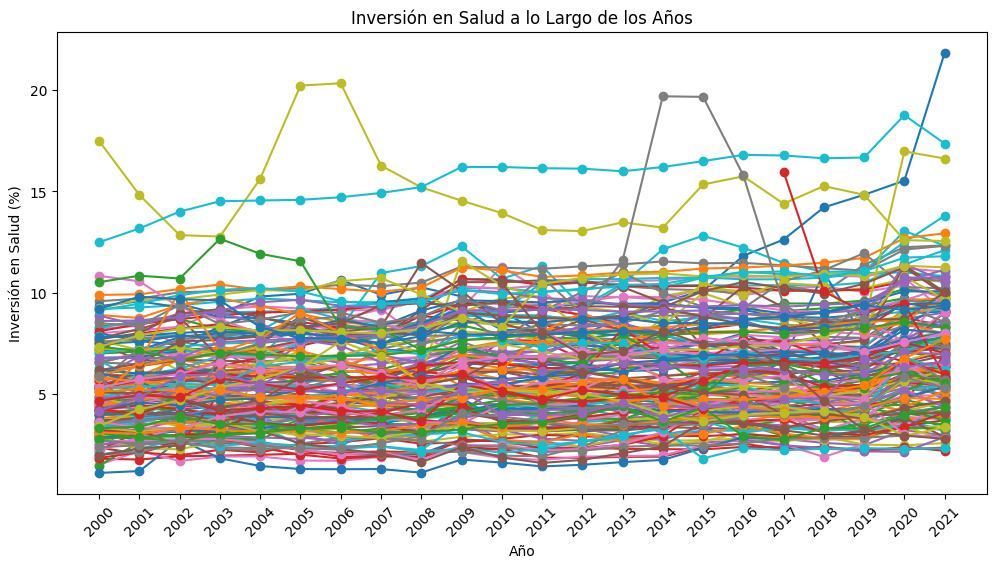

In [ ]:
# Primero, "derretimos" el DataFrame para tener años y valores de inversión en columnas separadas
df_melted = df_final.melt(id_vars='Countries',
                          value_vars=[str(year) for year in range(2000, 2022)],
                          var_name='Year',
                          value_name='Investment')

# Ahora, creamos el gráfico
plt.figure(figsize=(12, 6))
for country in df_melted['Countries'].unique():
    country_data = df_melted[df_melted['Countries'] == country]
    plt.plot(country_data['Year'], country_data['Investment'], marker='o', label=country)

plt.title('Inversión en Salud a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Inversión en Salud (%)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Encuentra los 5 países con la mayor y menor inversión en salud
top_countries = df_final.nlargest(5, 'Average_Investment')['Countries']
bottom_countries = df_final.nsmallest(5, 'Average_Investment')['Countries']

# Filtrar los datos para incluir solo esos países
top_bottom_countries = df_final[df_final['Countries'].isin(top_countries) | df_final['Countries'].isin(bottom_countries)]

# Derretir el DataFrame para tener años y valores de inversión en columnas separadas
df_melted = top_bottom_countries.melt(id_vars='Countries',
                                      value_vars=[str(year) for year in range(2000, 2022)],
                                      var_name='Year',
                                      value_name='Investment')

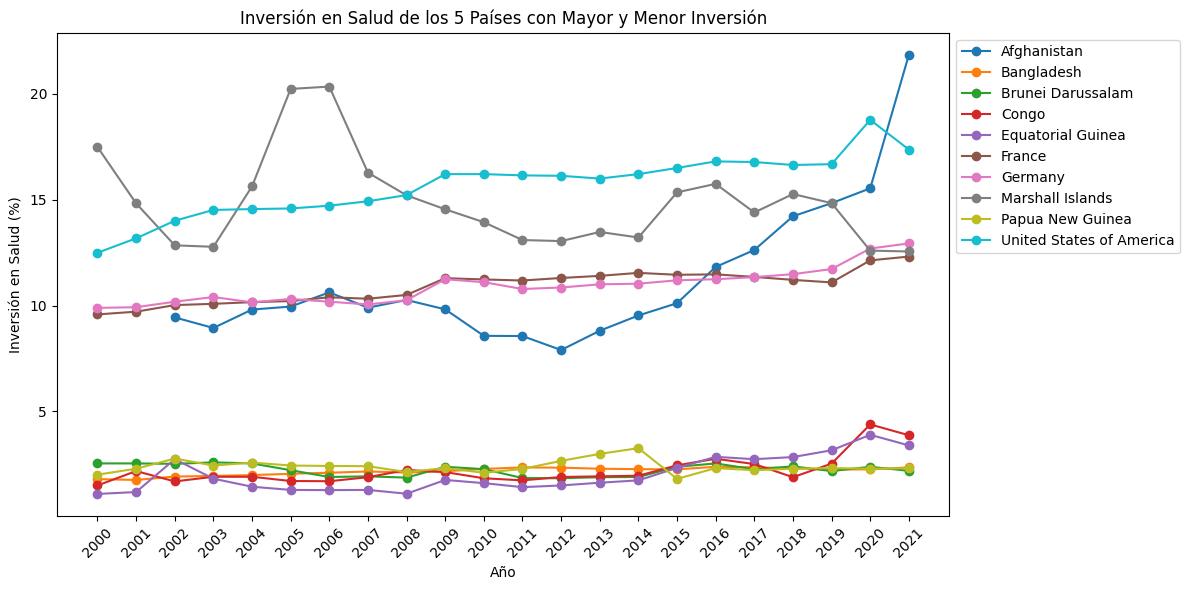

In [ ]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
for country in df_melted['Countries'].unique():
    country_data = df_melted[df_melted['Countries'] == country]
    plt.plot(country_data['Year'], country_data['Investment'], marker='o', label=country)

plt.title('Inversión en Salud de los 5 Países con Mayor y Menor Inversión')
plt.xlabel('Año')
plt.ylabel('Inversión en Salud (%)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Coloca la leyenda fuera del gráfico
plt.tight_layout()  # Ajusta automáticamente los parámetros para dar espacio a la leyenda
plt.show()

In [ ]:
# Asegúrate de que df_melted esté definido correctamente con 'Countries', 'Year' e 'Investment'
fig = px.line(df_melted, x='Year', y='Investment', color='Countries', markers=True,
              title='Inversión en Salud de los 5 Países con Mayor y Menor Inversión',
              labels={'Investment': 'Inversión en Salud (%)', 'Year': 'Año'})

# Actualizar layout para mejorar la presentación
fig.update_layout(xaxis_tickangle=-45, legend_title='Países',
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

fig.show()


## Análisis de Regresión

In [ ]:
# Seleccionar características y objetivo
X = df_final[['popData2019', 'cases', 'Average_Investment']]
y = df_final['deaths']

In [ ]:
X.shape

(166, 3)

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [ ]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de rendimiento
print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 245243193.0660618
R^2: 0.34269963488834665


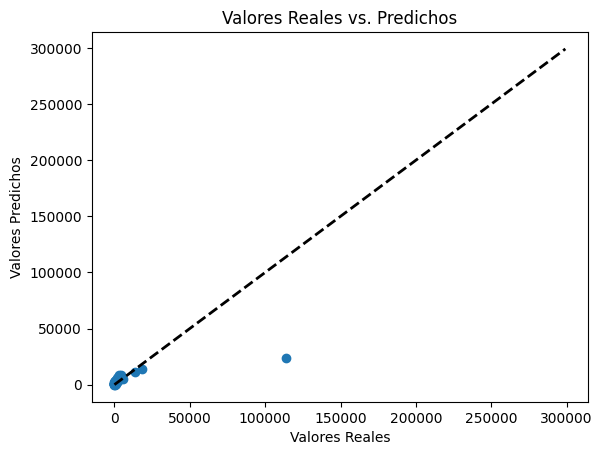

In [ ]:
# Crear un gráfico de dispersión de los valores reales vs. las predicciones
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.show()

In [ ]:
# Crear el gráfico de dispersión
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Valores Reales', 'y': 'Valores Predichos'}, title='Valores Reales vs. Predichos')

# Agregar la línea de identidad
fig.add_shape(type='line', line=dict(dash='dash'),
              x0=y_test.min(), y0=y_test.min(),
              x1=y_test.max(), y1=y_test.max())

fig.show()